#  Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten, Activation
from keras.utils import to_categorical
import os
import cv2

Using TensorFlow backend.
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/fra

In [2]:
#global variables
DATA_DIR = './Chess'
CATEGORIES = ['Bishop', 'King', 'Knight', 'Pawn', 'Queen', 'Rook']
IMG_SIZE =50

# Loading the data

In [3]:
data = []
for categories in CATEGORIES:
    path = os.path.join(DATA_DIR, categories)
    class_num = CATEGORIES.index(categories)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path,img), 0)
            new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
            data.append([new_array, class_num])
        
        except Exception as e:
            pass
       
    

In [4]:
data

[[array([[255, 255, 255, ..., 255, 246, 255],
         [255, 255, 255, ..., 251, 255, 255],
         [255, 255, 255, ..., 255, 254, 254],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [255, 248, 255, ..., 255, 255, 255],
         [255, 255, 246, ..., 255, 255, 255]], dtype=uint8),
  0],
 [array([[ 13,  13,  13, ...,  19,  19,  19],
         [ 13,  13,  13, ...,  19,  19,  20],
         [ 13,  14,  14, ...,  20,  20,  20],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
  0],
 [array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 223, 204, 254],
         [255, 255, 255, ..., 255, 254, 255]], dtype=uint8),
  0],
 [array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 2

In [5]:
#shape of data
np.shape(data)

(555, 2)

# Breaking the data into features and labels

In [6]:
x = []
y = []

for feature, labels in data:
    x.append(feature)
    y.append(labels)
x = np.array(x)

# Noramlization

In [7]:
x = x / 255

# Printing some features and thier labels

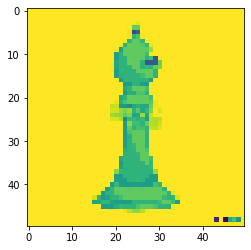

label :  0


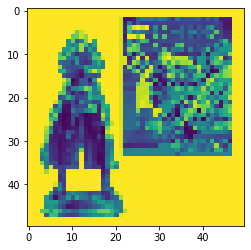

label :  3


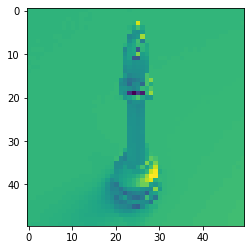

label :  0


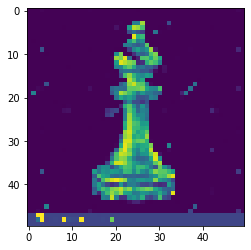

label :  0


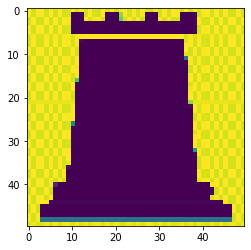

label :  5


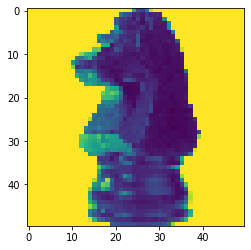

label :  2


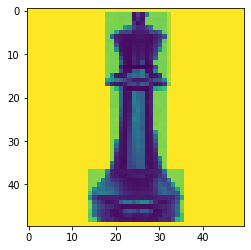

label :  4


In [8]:
index = [2,321,12,43,543,200,400]
for i in index:
    plt.imshow(x[i])
    plt.show()
    print('label : ', y[i])

# Converting labels to categorical data


In [9]:
y = to_categorical(y)

In [10]:
y

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

# Reshaping the features

In [11]:
x = np.array(x).reshape(-1,IMG_SIZE,IMG_SIZE,1)

# Spliting the data into train and test

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1, random_state=0)

In [13]:
from keras.preprocessing.image import ImageDataGenerator


# With data augmentation to prevent overfitting (accuracy 0.99286)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)



# Spliting the data into train and validation

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.1, random_state=0)

# CNN model

In [15]:
import keras
from keras.callbacks import Callback, EarlyStopping
model = Sequential([

    Conv2D(16, (5,5), input_shape=(IMG_SIZE, IMG_SIZE, 1), padding='same', activation='relu'),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    Conv2D(32, (3,3), padding='same', activation='relu'),

    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPool2D((2,2)),
  
    Dropout(0.2),
    
    Conv2D(32, (5,5), padding='same', activation='relu'),    
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), padding='same', activation='relu'),

    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPool2D((2,2)),
    
    Dropout(0.2),

    
    Flatten(),
    
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(6, activation='softmax')
    
    
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 16)        416       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 32)        9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 50, 50, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 25, 32)      

# Fitting the data

In [17]:

# Fit the model
batch_size = 64
epochs = 100
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              )

Epoch 1/100
8/8 [==============================] - 8s 1s/step - loss: 1.7834 - accuracy: 0.1884 - val_loss: 1.7835 - val_accuracy: 0.2143
Epoch 2/100
8/8 [==============================] - 8s 1s/step - loss: 1.7944 - accuracy: 0.2265 - val_loss: 1.7846 - val_accuracy: 0.1786
Epoch 3/100
8/8 [==============================] - 8s 1s/step - loss: 1.7836 - accuracy: 0.1924 - val_loss: 1.7890 - val_accuracy: 0.1786
Epoch 4/100
8/8 [==============================] - 9s 1s/step - loss: 1.7807 - accuracy: 0.1944 - val_loss: 1.7952 - val_accuracy: 0.1786
Epoch 5/100
8/8 [==============================] - 8s 1s/step - loss: 1.7807 - accuracy: 0.1984 - val_loss: 1.7863 - val_accuracy: 0.2143
Epoch 6/100
8/8 [==============================] - 8s 1s/step - loss: 1.7812 - accuracy: 0.1804 - val_loss: 1.7842 - val_accuracy: 0.1429
Epoch 7/100
8/8 [==============================] - 8s 1s/step - loss: 1.7766 - accuracy: 0.2104 - val_loss: 1.7815 - val_accuracy: 0.2500
Epoch 8/100
8/8 [=================

Epoch 60/100
8/8 [==============================] - 9s 1s/step - loss: 1.0624 - accuracy: 0.5832 - val_loss: 1.7439 - val_accuracy: 0.3036
Epoch 61/100
8/8 [==============================] - 9s 1s/step - loss: 1.0483 - accuracy: 0.6032 - val_loss: 2.1963 - val_accuracy: 0.3036
Epoch 62/100
8/8 [==============================] - 9s 1s/step - loss: 0.9620 - accuracy: 0.6132 - val_loss: 1.9655 - val_accuracy: 0.3571
Epoch 63/100
8/8 [==============================] - 9s 1s/step - loss: 0.9943 - accuracy: 0.5972 - val_loss: 1.9423 - val_accuracy: 0.3571
Epoch 64/100
8/8 [==============================] - 10s 1s/step - loss: 0.9773 - accuracy: 0.6072 - val_loss: 1.9039 - val_accuracy: 0.3393
Epoch 65/100
8/8 [==============================] - 9s 1s/step - loss: 0.9774 - accuracy: 0.6052 - val_loss: 1.8620 - val_accuracy: 0.3393
Epoch 66/100
8/8 [==============================] - 10s 1s/step - loss: 1.0287 - accuracy: 0.5872 - val_loss: 1.9237 - val_accuracy: 0.3214
Epoch 67/100
8/8 [=======

# Predicting the values

In [18]:
y_pred = model.predict(x_test)

# Checking accuracy of model

In [19]:

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred.round())

0.3392857142857143

# Plotting training loss vs validation loss

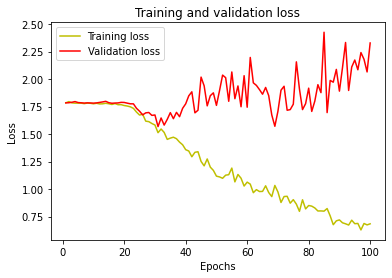

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training accuracy vs validation accuracy

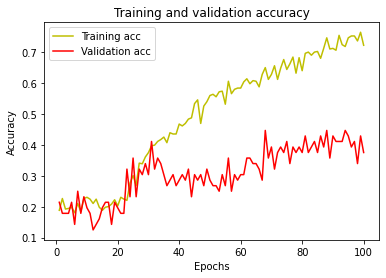

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()